In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
from simple_tritium_transport_model import Model, ureg, quantity_to_activity, plot_integrated_top_release, plot_irradiation
from baby_run_3 import *
from baby_run_4 import *
from baby_run_5 import *

ureg.mpl_formatter = "{:~P}"

COLLECTION_VOLUME = 10 * ureg.ml
LSC_SAMPLE_VOLUME = 10 * ureg.ml

In [2]:
import baby_run_3
model_run_3 = baby_run_3.baby_model
model_run_3.run(6 * ureg.day)


/home/remidm/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:224: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x0 = asarray(x0).flatten()
/home/remidm/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:239: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  retval = _minpack._hybrd(func, x0, args, 1, xtol, maxfev,
/home/remidm/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [3]:
import baby_run_5
model_run_5 = baby_run_5.baby_model

model_run_5.run(7 * ureg.day)

In [4]:
import baby_run_4
model_run_4 = baby_run_4.baby_model
model_run_4.run(6 * ureg.day)

/home/remidm/.local/lib/python3.10/site-packages/scipy/integrate/_quadrature.py:448: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  y = np.asarray(y)
/home/remidm/.local/lib/python3.10/site-packages/scipy/integrate/_quadrature.py:452: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.asarray(x)


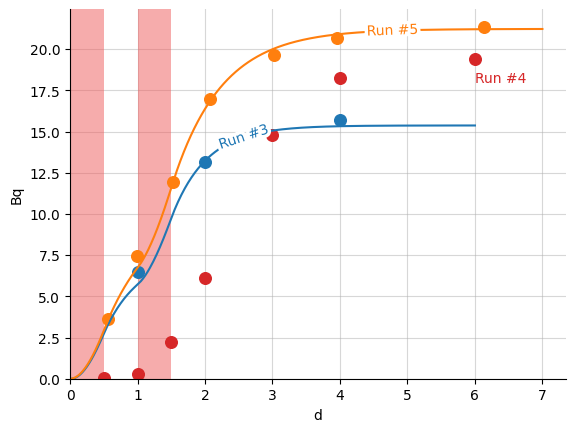

In [5]:
plt.figure()

plot_irradiation(model_run_3, facecolor="#EF5B5B", alpha=0.5)

color_run_3 = "tab:blue"
color_run_4 = "tab:red"
color_run_5 = "tab:orange"

plot_integrated_top_release(model_run_3, color=color_run_3, label="Run #3")

plt.scatter(
    baby_run_3.replacement_times,
    baby_run_3.cumulative_release,
    s=70,
    color=color_run_3
)

plot_integrated_top_release(model_run_5, color=color_run_5, label="Run #5")

plt.scatter(
    baby_run_5.replacement_times,
    baby_run_5.cumulative_release,
    s=70,
    color=color_run_5
)

plt.scatter(
    baby_run_4.replacement_times,
    baby_run_4.cumulative_release,
    s=70,
    color=color_run_4
)

plt.annotate("Run #4", (6 * ureg.days, 18 * ureg.Bq), color=color_run_4)

plt.xlim(left=0 * ureg.day)
plt.ylim(bottom=0)
plt.gca().spines[["right", "top"]].set_visible(False)
plt.grid(alpha=0.5)
labelLines(plt.gca().get_lines(), zorder=2.5)
# plt.gcf().text(0.08, 0.97, "Cumulative tritium release", weight="bold", fontsize=15)
# axis below graph
plt.gca().set_axisbelow(True)
plt.savefig("cumulative_release_compare_runs.pdf")

In [6]:
print(model_run_3.k_top)
print(model_run_5.k_top)

print(model_run_3.neutron_rate * model_run_3.TBR)
print(model_run_5.neutron_rate * model_run_5.TBR)

1.47e-06 meter / second
1.0289999999999998e-06 meter / second
146440.8 particle / second
193365.84 particle / second
